In [2]:
import numpy as np
import random
from datetime import datetime

class BloomFilter:
    def __init__(self,m,k,seeds):
        self.H = [0]*m    # initialize the bit array all zeros
        self.m = m        # size of the bit array
        self.k = k        # number of hash functions
        self.p = 10**9 + 19            # choose a prime number >= N or biggest num U can be; let N = 10000
        self.seeds = seeds

    def hash(self,x,hfnum):
        hIds = []
        if hfnum == 1:
            for seed in self.seeds:
                random.seed(seed + x)
                hIds.append(np.random.randint(0,self.m-1))
        if hfnum == 2:
            for seed in self.seeds:
                random.seed(seed)
                a,b = np.random.randint(1, self.p - 1), np.random.randint(0, self.p - 1)
                hIds.append(np.int64(((a*x + b) % self.p) % self.m))
        return hIds
    

    def add(self,x,hfnum):
        if hfnum == 1:
            ids = self.hash(x,1)
            for i in ids:
                self.H[i] = 1
        elif hfnum == 2:
            ids = self.hash(x,2)
            for i in ids:
                self.H[i] = 1


    def contains(self,x,hfnum):
        if hfnum == 1:
            ids = self.hash(x,1)
            for i in ids:
                if self.H[i] == 0:
                    return False
            return True
        elif hfnum == 2:
            ids = self.hash(x,2)
            for i in ids:
                if self.H[i] == 0:
                    return False
            return True

In [18]:
import matplotlib.pyplot as plt
# choose arbitray m,k and generate (1) m random numbers from U as well as (2) first 2m even numbers
N = 10**9
m = 50
k = 6
Sdata1 = np.random.randint(0,N,m)
Sdata2 = np.arange(0,2*m,2)
h1rand = []
h1even = []
h2rand = []
h2even = []
seeds = []
for i in range(k):
        seeds.append(datetime.now().timestamp()*1000)      # get the current time in milliseconds)
bloom = BloomFilter(m,k,seeds)
for el in Sdata1:
    for h in bloom.hash(el,1):
         h1rand.append(h)
for el in Sdata2:
    for h in bloom.hash(el,1):
        h1even.append(h)
for el in Sdata1:
    for h in bloom.hash(el,2):
        h2rand.append(h)
for el in Sdata2:
    for h in bloom.hash(el,2):
        h2even.append(h)

C:\Users\jzho9\AppData\Local\Temp\ipykernel_13508\3894166803.py:23: RuntimeWarning: overflow encountered in long_scalars
  hIds.append(np.int64(((a*x + b) % self.p) % self.m))


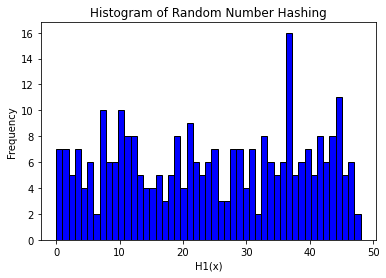

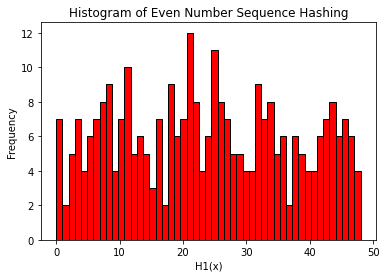

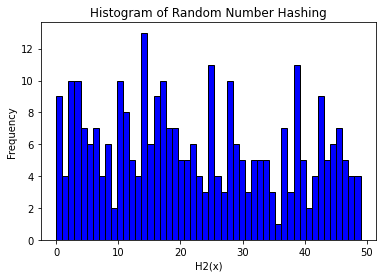

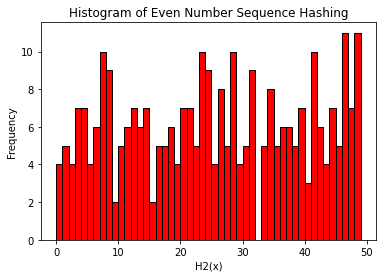

In [23]:
plt.hist(h1rand, bins= len(set(h1rand)), color='blue', edgecolor='black')
plt.xlabel('H1(x)')
plt.ylabel('Frequency')
plt.title('Histogram of Random Number Hashing')
plt.show()

plt.hist(h1even, bins= len(set(h1even)), color='red', edgecolor='black')
plt.xlabel('H1(x)')
plt.ylabel('Frequency')
plt.title('Histogram of Even Number Sequence Hashing')
plt.show()

plt.hist(h2rand, bins= len(set(h2rand)), color='blue', edgecolor='black')
plt.xlabel('H2(x)')
plt.ylabel('Frequency')
plt.title('Histogram of Random Number Hashing')
plt.show()

plt.hist(h2even, bins= len(set(h2even)), color='red', edgecolor='black')
plt.xlabel('H2(x)')
plt.ylabel('Frequency')
plt.title('Histogram of Even Number Sequence Hashing')
plt.show()

In [44]:
def calc_medfpr(N,n,c,k,Sdata):        # return median fpr value for both hashes
    medfpr1 = 0
    medfpr2 = 0
    fpr1 = []
    fpr2 = []
    for i in range(10):
        seeds = []
        for i in range(k):
            seeds.append(datetime.now().timestamp()*1000)      # get the current time in milliseconds)
        for hnum in range(1,3):
            bloom = BloomFilter(c*n,k,seeds)
            for el in Sdata:
                bloom.add(el,hnum)
            fpr = 0
            actual_false_num = 0
            for i in range(1000):                # do lots of queries on randints of U
                curr = np.random.randint(0,N)   # may or may not be in S
                if curr not in Sdata:
                    actual_false_num += 1
                    if bloom.contains(curr,hnum):
                        fpr += 1
            if hnum == 1:
                fpr1.append(fpr/actual_false_num)
            else:
                fpr2.append(fpr/actual_false_num)
    medfpr1 = np.median(fpr1)
    medfpr2 = np.median(fpr2)

    return medfpr1,medfpr2
    

In [47]:
N = 10**9
n = 10000
c_trials = [10,15]
k_trials = []
for c in c_trials:
    k = []
    for i in np.arange(.4,1.1,.1):
        k.append(int(c*round(i,1)))
    k_trials.append(k)

Sdata = np.random.randint(0,N,n)
c10_medfpr1 = []
c10_medfpr2 = []
c15_medfpr1 = []
c15_medfpr2 = []

for i in range(len(c_trials)):       # end up with 4 arrays of median fpr's
    for k in k_trials[i]:
        medfpr1,medfpr2 = calc_medfpr(N,n,c_trials[i],k,Sdata)
            # add data, contains, calc false positive rate, return median false positive rate overall 10 trials
        if c_trials[i] == 10:
            c10_medfpr1.append(medfpr1)
            c10_medfpr2.append(medfpr2)
        else:
            c15_medfpr1.append(medfpr1)
            c15_medfpr2.append(medfpr2)

print("False Positive Rates for c=10 (Hash1)",c10_medfpr1,'\n')
print("False Positive Rates for c=10 (Hash2)",c10_medfpr2,'\n')
print("False Positive Rates for c=15 (Hash1)",c15_medfpr1,'\n')
print("False Positive Rates for c=15 (Hash2)",c15_medfpr2,'\n')

C:\Users\jzho9\AppData\Local\Temp\ipykernel_14032\1310117208.py:23: RuntimeWarning: overflow encountered in long_scalars
  hIds.append(np.int64(((a*x + b) % self.p) % self.m))


False Positive Rates for c=10 (Hash1) [0.010499999999999999, 0.0085, 0.007, 0.008, 0.007003503503503504, 0.008, 0.0115] 

False Positive Rates for c=10 (Hash2) [0.0115, 0.008, 0.006500000000000001, 0.0085, 0.007, 0.0095, 0.010499999999999999] 

False Positive Rates for c=15 (Hash1) [0.001, 0.001, 0.0, 0.0015, 0.0005, 0.001, 0.001] 

False Positive Rates for c=15 (Hash2) [0.001, 0.001, 0.0, 0.001, 0.001, 0.001, 0.0005] 



In [48]:
c_trials = [10,15]
k_trials = []
for c in c_trials:
    k = []
    for i in np.arange(.4,1.1,.1):
        k.append(int(c*round(i,1)))
    k_trials.append(k)
print(k_trials)

[[4, 5, 6, 7, 8, 9, 10], [6, 7, 9, 10, 12, 13, 15]]
